In [2]:
import numpy as np
import pandas as pd
import mplfinance as mpf

In [3]:
def generate_pattern(n_bars=100, pattern_type='ascending_triangle'):
    # Set up the initial values with variability for the upper resistance and lower support

    if pattern_type in ['ascending_triangle', 'ascending_wedge']:
        upper_start = np.random.uniform(55, 65)  # Randomize starting point of the upper resistance
        lower_start = np.random.uniform(35, 45)  # Randomize starting point of the lower support
        if pattern_type == 'ascending_triangle':
            bias_slope_1 = np.random.uniform(-10, 10)
            bias_slope_2 = np.random.uniform(-10, 10)
            upper_end = np.random.uniform(55 + bias_slope_1, 65 + bias_slope_2)  # Converging upper resistance
            lower_end = upper_end  # Both converge at the same point
        elif pattern_type == 'ascending_wedge':
            upper_end = upper_start  # Horizontal upper resistance
            lower_end = upper_end  # Both converge at the same point
    elif pattern_type in ['descending_triangle', 'descending_wedge']:
        upper_start = np.random.uniform(55, 65)  # Randomize starting point of the upper resistance
        lower_start = np.random.uniform(35, 45)  # Randomize starting point of the lower support
        if pattern_type == 'descending_triangle':
            bias_slope_1 = np.random.uniform(-10, 0)  # Decreasing upper slope
            bias_slope_2 = np.random.uniform(0, 5)   # Flat or slightly decreasing lower slope
            lower_end = np.random.uniform(35 + bias_slope_1 , 45 + bias_slope_2 )  # Lower end close to lower start
            upper_end = lower_end  # Ensure upper line is above lower and decreasing
        elif pattern_type == 'descending_wedge':
            lower_end = lower_start + np.random.uniform(-0.1, 0.1)  # Slightly decreasing or flat lower support
            upper_end = lower_end  # Ensure upper line is above lower and decreasing

    # Generate the upper and lower slopes with some randomness and varying steepness
    upper_slope = np.linspace(upper_start, upper_end, n_bars)
    lower_slope = np.linspace(lower_start, lower_end, n_bars)
    
    # Adding randomness to make the lines less predictable
    upper_slope += np.random.uniform(-0.5, 0.5, n_bars)
    lower_slope += np.random.uniform(-0.5, 0.5, n_bars)

    # Initialize price data
    prices = [np.random.uniform(lower_start, upper_start)]
    direction = 1 if np.random.rand() > 0.5 else -1  # Random initial direction

    # Generate the price data that oscillates between the upper and lower slopes
    for i in range(1, n_bars):
        local_trend = np.random.uniform(-4, 4)  # Small local trend factor
        price = prices[-1] + direction * (np.random.uniform(0.5, 1.5) + local_trend)
        
        # Check for slope boundaries and reverse direction if needed
        if price >= upper_slope[i]:
            price = upper_slope[i]  # Snap to upper line
            direction = -1  # Reverse direction to downward
        elif price <= lower_slope[i]:
            price = lower_slope[i]  # Snap to lower line
            direction = 1  # Reverse direction to upward
            
        prices.append(price)

    # Create the OHLC data
    open_prices = prices[:-1] + np.random.uniform(-0.5, 0.5, n_bars - 1)
    close_prices = prices[1:] + np.random.uniform(-0.5, 0.5, n_bars - 1)
    high_prices = np.maximum(open_prices, close_prices) + np.random.uniform(0, 1, n_bars - 1)
    low_prices = np.minimum(open_prices, close_prices) - np.random.uniform(0, 1, n_bars - 1)
    volume = np.random.randint(1000, 5000, n_bars - 1)
    
    # Prepare the DataFrame
    data = {
        'Date': pd.date_range(start='2023-01-01', periods=n_bars-1),
        'Open': open_prices,
        'High': high_prices,
        'Low': low_prices,
        'Close': close_prices,
        'Volume': volume
    }
    
    df = pd.DataFrame(data)
    df.set_index('Date', inplace=True)

    return df, upper_slope[1:], lower_slope[1:]

In [4]:
def get_pattern_graph(pattern_type):
    target_df, upper_slope, lower_slope = generate_pattern(n_bars=100, pattern_type=pattern_type)

    # Plot the generated stock data with mplfinance and add the upper and lower slopes
    apds = [
        mpf.make_addplot(upper_slope, color='red', linestyle='--', width=1),
        mpf.make_addplot(lower_slope, color='green', linestyle='--', width=1)
    ]

    mpf.plot(target_df, type='candle', volume=True, title='Triangle Pattern with Noise Among Trends', style='charles', addplot=apds)

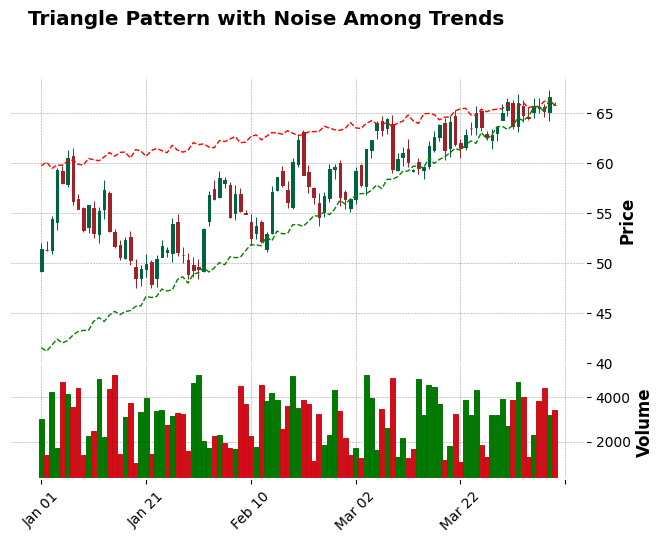

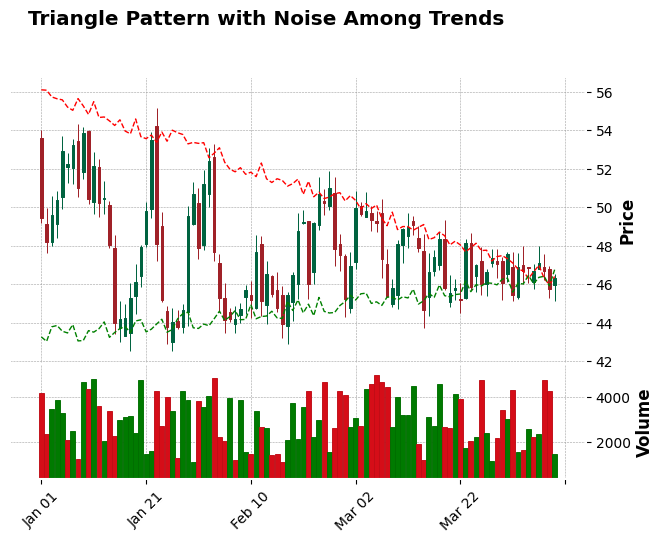

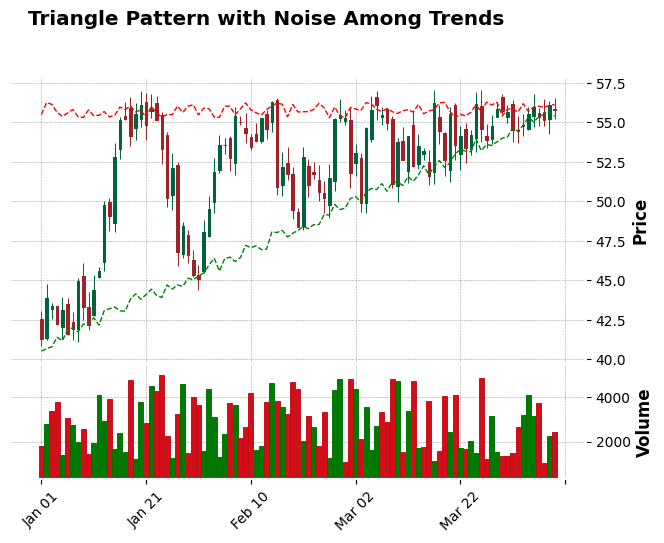

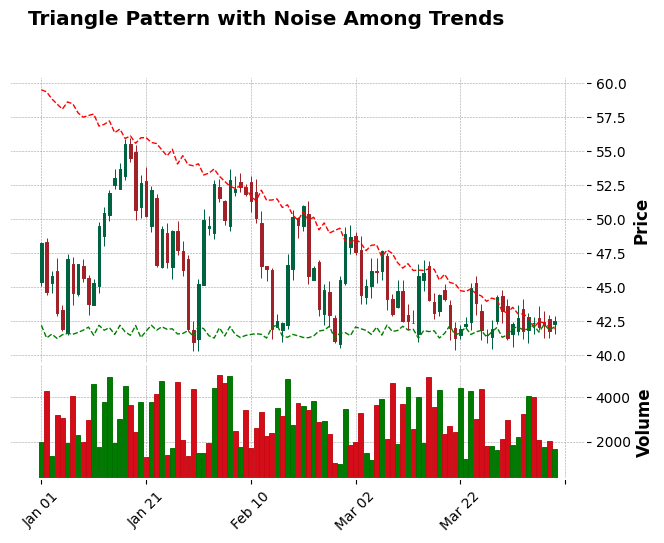

In [6]:
get_pattern_graph('ascending_triangle')
get_pattern_graph('descending_triangle')
get_pattern_graph('ascending_wedge')
get_pattern_graph('descending_wedge')